# Import Library

In [1]:
import roboticstoolbox as rtb
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Forward Kinematic

In [2]:
# Defind DH-Table
robot = rtb.DHRobot([
        rtb.RevoluteMDH(d = 200), # joint 1
        rtb.RevoluteMDH(alpha = -pi/2 ,d = -120 ,offset = -pi/2), # joint 2
        rtb.RevoluteMDH(a = 250 ,d = 100 ,offset = pi/2), # joint 3
        rtb.RevoluteMDH(alpha = pi/2, d = 280), # End-effector
    ],
    name = "3R_Robot"
)
robot

DHRobot: 3R_Robot, 4 joints (RRRR), dynamics, modified DH parameters
┌──────┬────────┬───────────┬──────┐
│ aⱼ₋₁ │  ⍺ⱼ₋₁  │    θⱼ     │  dⱼ  │
├──────┼────────┼───────────┼──────┤
│  0.0 │   0.0° │        q1 │  200 │
│  0.0 │ -90.0° │  q2 - 90° │ -120 │
│  250 │   0.0° │  q3 + 90° │  100 │
│  0.0 │  90.0° │        q4 │  280 │
└──────┴────────┴───────────┴──────┘

┌──┬──┐
└──┴──┘

In [3]:
# Defind q value for visualization
q = [0,0,0,0]

In [4]:
T_0e = robot.fkine(q)
T_0e

   1         0         0         0         
   0         1         0        -20        
   0         0         1         730       
   0         0         0         1         


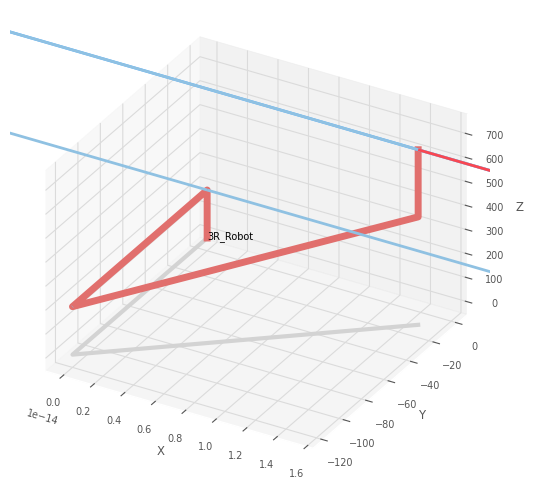

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, '3R_Robot')

<Figure size 640x480 with 0 Axes>

In [5]:
robot.plot(q)

# Find Workspace 

In [6]:
# Define joint angle ranges for q1 - q3
theta1_range = np.linspace(-np.pi, np.pi, 100)  # Joint 1
theta2_range = np.linspace(-np.pi, np.pi, 100)  # Joint 2
theta3_range = np.linspace(-np.pi, np.pi, 100)  # Joint 3

In [7]:
workspace = []

In [8]:
# Forward Kineamtic use q1 - q3 in define ranges to find Taskspace
for theta1 in theta1_range:
    for theta2 in theta2_range:
        for theta3 in theta3_range:
                T = robot.fkine([theta1, theta2, theta3, 0])
                position = T.t
                if T.t[2] >= 0.0: 
                    workspace.append(position)

In [9]:
len(workspace)

758000

In [10]:
workspace = np.array(workspace)

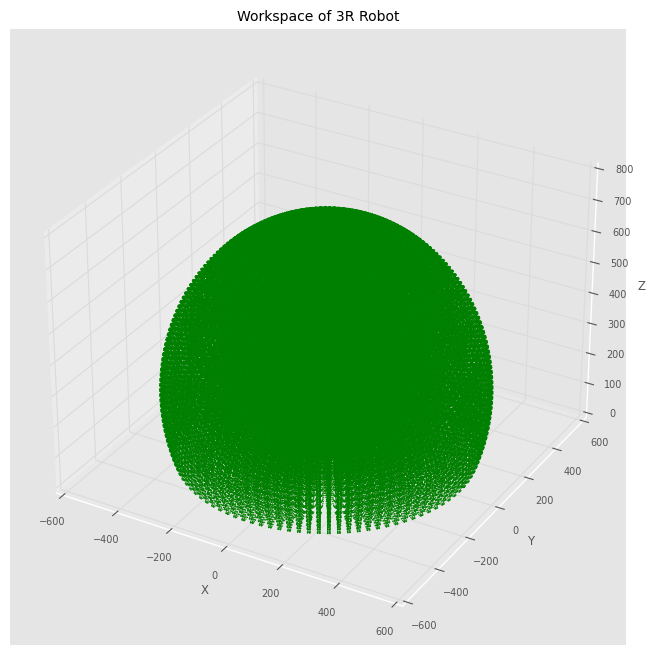

In [14]:
# Plot the 3D workspace
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the workspace points
ax.scatter(workspace[:, 0], workspace[:, 1], workspace[:, 2], s=1, c='g', marker='.')

# Set labels and title
ax.set_title('Workspace of 3R Robot')
ax.set_xlabel('X')
ax.set_xlim(-600, 600)
ax.set_ylabel('Y')
ax.set_ylim(-600, 600)
ax.set_zlabel('Z')
ax.set_zlim(0, 800)

plt.show()

In [12]:
print('x max : ',max(workspace[:, 0]))
print('x min : ',min(workspace[:, 0]))

print('y max : ',max(workspace[:, 1]))
print('y min : ',min(workspace[:, 1]))

print('z max : ',max(workspace[:, 2]))
print('z min : ',min(workspace[:, 2]))

x max :  530.3010473870356
x min :  -530.3010473870356
y max :  530.2846913130685
y min :  -530.1839030082405
z max :  729.8741355957964
z min :  0.6327865390415184


In [13]:
# Save workspace to file
np.save('src/rrr_robot/config/workspace_pos.npy',workspace)